In [9]:
# Re-run this cell to install and import the necessary libraries and load the required variables
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')


# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100 

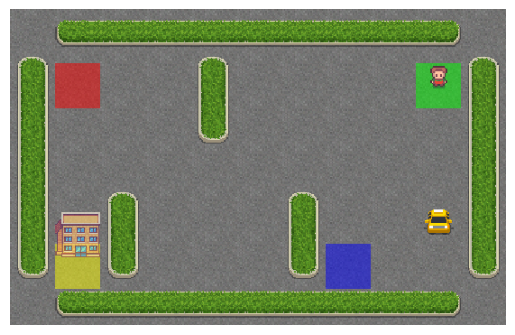

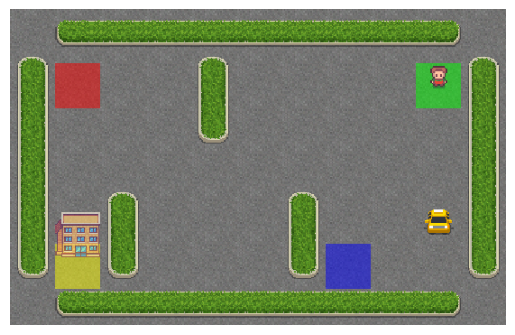

In [ ]:
import matplotlib.pyplot as plt
def render()  : 
    image = env.render()
    plt.imshow(image)
    plt.axis('off')
    plt.show()
env.reset(seed=42)
render()



In [14]:
print(env.action_space.n)  # Number of possible actions
print(env.observation_space.n)  # Number of possible states

6
500


In [114]:
print(np.random.rand())

0.4837476360442964


In [78]:
def update_q_value(state, action, reward, next_state, q_table , alpha, gamma):
    best_next_action = np.max(q_table[next_state])   # max over next actions
    current_q_value = q_table[state, action]
    
    # Q-learning update
    q_table[state, action] = (1 - alpha) * current_q_value + alpha * (
        reward + gamma * best_next_action 
    )

In [79]:
def epsilon_greedy(state, q_table , epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore: select a random action
    else:
        return np.argmax(q_table[state])  # Exploit: select the action with max Q-value

In [84]:
# Q learing parameters
alpha = 0.1
gamma = 0.9
epsilon = 1.0
min_epsilon = 0.01
decay = 0.995
episodes = 40000
max_steps = 500
# Initialize the Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))
reward_per_episode = []
rewards_eps_greedy = []

for episode in range(episodes):
    #print progress every 500 episodes
    episode_reward = 0
    if episode % 500 == 0:
        print(f"Episode {episode}/{episodes}")
    state, info = env.reset( seed=42)
    done = False
    for step in range(max_steps):
        
        action = epsilon_greedy(state, q_table , epsilon)

        # Take the action and observe the next state and reward
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Update the Q-value using the Q-learning formula
        update_q_value(state, action, reward, next_state, q_table , alpha, gamma)
        episode_reward += reward
        
        state = next_state


        if done:
            break
    epsilon = max(min_epsilon, epsilon*0.9995)
    print(f"Episode {episode} finished after {step+1} steps with reward {episode_reward}")
    reward_per_episode.append(episode_reward)
    rewards_eps_greedy.append(episode_reward)


Episode 0/40000
Episode 0 finished after 200 steps with reward -875
Episode 1 finished after 200 steps with reward -812
Episode 2 finished after 200 steps with reward -749
Episode 3 finished after 200 steps with reward -848
Episode 4 finished after 200 steps with reward -767
Episode 5 finished after 200 steps with reward -758
Episode 6 finished after 200 steps with reward -803
Episode 7 finished after 200 steps with reward -668
Episode 8 finished after 200 steps with reward -839
Episode 9 finished after 200 steps with reward -731
Episode 10 finished after 200 steps with reward -821
Episode 11 finished after 200 steps with reward -920
Episode 12 finished after 200 steps with reward -848
Episode 13 finished after 200 steps with reward -650
Episode 14 finished after 200 steps with reward -857
Episode 15 finished after 200 steps with reward -704
Episode 16 finished after 200 steps with reward -740
Episode 17 finished after 200 steps with reward -749
Episode 18 finished after 200 steps with

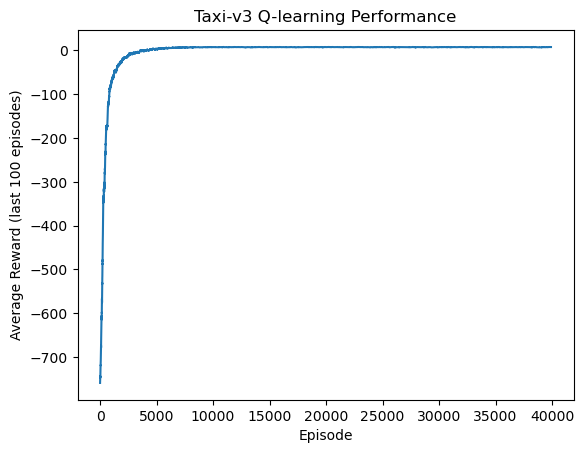

In [86]:
import matplotlib.pyplot as plt

window = 100
smoothed = [np.mean(reward_per_episode[i-window:i]) 
            for i in range(window, len(reward_per_episode))]

plt.plot(smoothed)
plt.xlabel("Episode")
plt.ylabel("Average Reward (last 100 episodes)")
plt.title("Taxi-v3 Q-learning Performance")
plt.show()


In [118]:
# saved policy 
np.save("q_table_taxi.npy", q_table)
np.save("rewards_eps_greedy_taxi.npy", rewards_eps_greedy)
print("Q-table and rewards saved.")
print("Q-table and rewards saved.")
saved_policy = np.load("q_table_taxi.npy")
print("Loaded Q-table shape:", saved_policy.shape)
policy_dict = {i: np.argmax(saved_policy[i]) for i in range(saved_policy.shape[0])}
print("Sample of learned policy (state: action):")
print(policy_dict)


Q-table and rewards saved.
Q-table and rewards saved.
Loaded Q-table shape: (500, 6)
Sample of learned policy (state: action):
{0: 0, 1: 0, 2: 4, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 3, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 1, 43: 0, 44: 0, 45: 0, 46: 2, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 3, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 2, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 3, 79: 0, 80: 0, 81: 0, 82: 2, 83: 0, 84: 0, 85: 0, 86: 4, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 1, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 1, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 3, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 3

In [119]:

import numpy as np

# Reset environment with seed 42
state, info = env.reset(seed=42)

frames = []                   # list to store rendered frames
episode_total_reward = 0.0    # to accumulate total reward

max_actions = 16

for step in range(max_actions):
    # Render current state (as image/frame)
    frame = env.render()
    frames.append(frame)

    # Choose action using your trained agent's policy
    # (replace this line with your actual policy logic)
    action = policy_dict.get(state)  # Example: for DQN or RL agent
    # If you don’t have predict() use something like: np.argmax(Q[state])

    # Take the action
    next_state, reward, done, truncated, info = env.step(action)

    # Accumulate reward
    episode_total_reward += reward

    # Move to next state
    state = next_state

    # If episode finished early
    if done or truncated:
        break

env.close()

print("Episode total reward:", episode_total_reward)
print("Number of frames:", len(frames))

Episode total reward: 8.0
Number of frames: 13
